<a href="https://colab.research.google.com/github/Vakhranev/Compling/blob/master/Gospodi_za_chto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выбранные задания:

Описательный анализ данных с привязкой к целевой переменной (toxic) и 2 другим дополнительным колонкам (как минимум 5 статистик на каждую группу) - 1.5 балл

Бейзлайн модель из sklearn (векторайзер + модель) c подбором параметров в greed_search (как минимум 10 параметров)  - 1.5 

Ансамбль из моделей в sklearn (ансамблевые модели типа randomforest не считаются). Нужно минимум 5 разных моделей - 2 балла

Любая нейронная модель (минимум 5 слоев) с Dropout, Pooling и колбеками - 2 балла

In [4]:
import pandas as pd

In [5]:
f = pd.read_csv('jigsaw-toxic-comment-train.csv.zip')
f.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Сравним ряд параметров для трёх групп:
1. Toxic: toxic=1 и toxic=0
2. Severe toxic: severe_toxic=1 и severe_toxic=0
3. Obscene: obscene=1 и obscene=0

Сравним по среднему количеству символов, среднему количеству заглавных букв (мы видим в примерах выше токсичный комментарий, написанный капсом), среднему количеству знаков пунктуации, среднему количеству цифр, а также по количеству слов (точнее — токенов) в столбце comment_text.

In [3]:
from string import punctuation
f['Количество символов'] = f['comment_text'].apply(len)
f['Количество заглавных букв'] = f['comment_text'].apply(lambda comment: len([i for i in comment if i.isupper()]))
f['Количество знаков препинания'] = f['comment_text'].apply(lambda comment: len([i for i in comment if i in punctuation]))
f['Количество цифр'] = f['comment_text'].apply(lambda comment: len([i for i in comment if i.isdigit()]))
f['Количество слов'] = f['comment_text'].apply(lambda comment: len(comment.split()))

In [4]:
f.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Количество символов,Количество заглавных букв,Количество знаков препинания,Количество цифр,Количество слов
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,10,9,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,12,10,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,6,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,21,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,5,0,13
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,1,4,0,13
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,37,0,0,8
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,4,4,0,20
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,7,19,11,83
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,2,0,0,12


In [5]:
def analyze(column):
  return(f.groupby(column)['Количество символов', 'Количество заглавных букв', 'Количество знаков препинания', 'Количество цифр', 'Количество слов'].agg('mean'))

In [6]:
analyze('toxic')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Количество символов,Количество заглавных букв,Количество знаков препинания,Количество цифр,Количество слов
toxic,,,,,
0,402.691178,14.484189,16.974704,3.248698,68.415161
1,280.604097,44.689675,14.257202,1.995885,48.573466


Токсичные выражения короче по символам, словам, в них меньше знаков препинания и цифр, но больше заглавных букв (за счёт комментариев, написанных капсом, видимо).

In [7]:
analyze('severe_toxic')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Количество символов,Количество заглавных букв,Количество знаков препинания,Количество цифр,Количество слов
severe_toxic,,,,,
0,389.999386,15.988131,16.591014,3.136258,66.358270
1,505.456677,173.841998,30.690112,2.293068,84.462793


У особо токсичных выражений статистика другая: в них больше символов, слов, знаков перпинания, а количество заглавных букв больше, чем в 10 раз. Только цифр меньше.

In [8]:
analyze('obscene')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Количество символов,Количество заглавных букв,Количество знаков препинания,Количество цифр,Количество слов
obscene,,,,,
0,397.332876,15.299590,16.850087,3.193029,67.559707
1,280.951730,53.490033,14.358072,2.011367,48.362109


Статистика непристойностей посвоим показателям очень близка к статистике токсичных комментариев.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X = f['comment_text']
y = f['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_train.shape

(167661, 224367)

In [10]:
X_test = vectorizer.transform(X_test)
X_test.shape

(55888, 224367)

Проверим сначала 5 параметров, а то Colab крашится:

In [72]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters_SGD = {'loss' : ['hinge', 'log', 'huber'],
                  'penalty' : ['l2', 'elasticnet'],
                  'alpha' : [0.0001, 0.0002],
                  'fit_intercept' : [True, False],
                  'n_iter_no_change' : [5, 10]
                 }

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
stratified_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid_search = GridSearchCV(sgd, parameters_SGD, cv=stratified_folds, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8336018795157999
Best parameters: {'alpha': 0.0001, 'fit_intercept': False, 'loss': 'hinge', 'n_iter_no_change': 5, 'penalty': 'elasticnet'}


Теперь — ещё 5 + лучшие параметры с первого раза:

In [74]:
parameters_SGD = {'loss' : ['hinge'],
                  'penalty' : ['elasticnet'],
                  'alpha' : [0.0001],
                  'fit_intercept' : [False],
                  'n_iter_no_change' : [5],
                  'max_iter': [700, 1000],
                  'early_stopping' : [True, False],
                  'validation_fraction' : [0.1, 0.2],
                  'power_t' : [0.5, 0.6],
                  'shuffle' : [True, False]
                 }

In [75]:
grid_search = GridSearchCV(sgd, parameters_SGD, cv=stratified_folds, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8330463502020953
Best parameters: {'alpha': 0.0001, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'elasticnet', 'power_t': 0.6, 'shuffle': True, 'validation_fraction': 0.2}


Ну и, на всякий случай, убедимся, что на лучших параметрах из второго раз, параметр с певого раза тоже будут лучшими.

In [77]:
parameters_SGD = {'loss' : ['hinge', 'log', 'huber'],
                  'penalty' : ['l2', 'elasticnet'],
                  'alpha' : [0.0001, 0.0002],
                  'fit_intercept' : [True, False],
                  'n_iter_no_change' : [5, 10],
                  'max_iter': [1000],
                  'early_stopping' : [False],
                  'validation_fraction' : [0.2],
                  'power_t' : [0.6],
                  'shuffle' : [True]
                 }

In [78]:
grid_search = GridSearchCV(sgd, parameters_SGD, cv=stratified_folds, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8347533958533304
Best parameters: {'alpha': 0.0001, 'early_stopping': False, 'fit_intercept': False, 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 10, 'penalty': 'elasticnet', 'power_t': 0.6, 'shuffle': True, 'validation_fraction': 0.2}


Итак, по итогам трёх заходов — лучшие параметры:
1. Функция потерь — 'hinge'
2. Регуляризатор — 'elasticnet' 
3. Альфа (константа, умножающая регуляризацию) — 0,0001
4. Отцентрированы ли данные — нет
5. Количество итераций без улучшений для ожидания перед ранней остановкой — 10 (но, в итоге, без ранней остановки даже лучше)
6. Максимальное количество эпох — 1000
7. Использовать ли раннюю остановку для прекращения обучения, когда оценка не улучшается — нет
8. Доля данных обучения, отведенных в качестве валидации, установленной для ранней остановки — 0,2
9. Экспонента для обратного масштабирования скорости обучения — 0,6
10. Должны ли данные в трейне перемешиваться после каждой эпохи — да

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import FunctionTransformer

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X = f['comment_text']
y = f['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf1 = LogisticRegression()
clf2 = XGBClassifier()
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()
clf5 = MultinomialNB()

eclf = VotingClassifier(estimators=[
        ('lor', clf1), ('xgbc', clf2), ('gnb', clf3), ('dtc', clf4), ('mnb', clf5)], voting='soft')

voting = Pipeline([
    ('vect', CountVectorizer(analyzer='word', max_features=1000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('to_dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)), 
    ('clf', eclf),
    ])
voting = voting.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
from sklearn.metrics import *
predictions = voting.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))

Precision:   0.87
Recall:   0.76
F1-measure:   0.81
Accuracy:   0.94


In [31]:
from collections import Counter

In [33]:
vocab = Counter()

for sym in f.comment_text:
    sym = sym.lower()
    vocab.update(sym)

In [34]:
len(vocab)

4385

In [35]:
filtered_vocab = set()

for sym in vocab:
    if vocab[sym] > 5:
        filtered_vocab.add(sym)

In [36]:
len(filtered_vocab)

2038

In [37]:
sym2id = {'UNK':1, 'PAD':0}

for sym in filtered_vocab:
    sym2id[sym] = len(sym2id)

In [38]:
id2sym = {i:sym for sym, i in sym2id.items()}

In [40]:
X = []

for text in f.comment_text:
    text = text.lower()
    ids = [sym2id.get(sym, 1) for sym in text]
    X.append(ids)

In [41]:
MAX_LEN = max(len(x) for x in X)

In [43]:
import numpy as np
MEAN_LEN = np.median([len(x) for x in X])

In [44]:
MAX_LEN, MEAN_LEN

(5165, 203.0)

In [45]:
MAX_LEN = 65

In [47]:
import tensorflow as tf
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [53]:
y = f.toxic.values

In [54]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [55]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y)

In [56]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.weights', 
                                                monitor='val_f1',
                                                verbose=1,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                mode='max',
                                                save_freq='epoch'
                                               )

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_f1', 
                                              min_delta=0.01,
                                              patience=20,
                                              verbose=1, 
                                              mode='max',
                                              )

In [58]:
from tensorflow.keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [59]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(sym2id), output_dim=10)(inputs)
conv1 = tf.keras.layers.Conv1D(kernel_size=16, filters=128, strides=1, kernel_regularizer='l2', activation='relu')(embeddings)
conv2 = tf.keras.layers.Conv1D(kernel_size=32, filters=128, strides=2, kernel_regularizer='l2', activation='relu')(conv1)
pool1 = tf.keras.layers.AveragePooling1D()(conv2)
drop1 = tf.keras.layers.Dropout(0.1)(pool1)
conv3 = tf.keras.layers.Conv1D(kernel_size=8, filters=32)(embeddings)
conv4 = tf.keras.layers.Conv1D(kernel_size=16, filters=32, strides=1)(conv3)
conv5 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=1, activation='relu')(conv4)
pool2 = tf.keras.layers.AveragePooling1D()(conv5)
conv6 = tf.keras.layers.Conv1D(kernel_size=4, filters=32, strides=2)(embeddings)
conv7 = tf.keras.layers.Conv1D(kernel_size=16, filters=32, strides=2, activation='relu')(conv6)
conv8 = tf.keras.layers.Conv1D(kernel_size=5, filters=32, strides=1, kernel_regularizer='l2')(conv7)
drop2 = tf.keras.layers.Dropout(0.2)(conv8)
conv9 = tf.keras.layers.Conv1D(kernel_size=16, filters=32, strides=1, kernel_regularizer='l2', activation='relu')(embeddings)
conv10 = tf.keras.layers.Conv1D(kernel_size=16, filters=32, padding='same',strides=1)(conv9)
conv11 = tf.keras.layers.Conv1D(kernel_size=8, filters=16, strides=3)(conv10)
conv12 = tf.keras.layers.Conv1D(kernel_size=3, filters=8, strides=2)(conv11)
drop3 = tf.keras.layers.Dropout(0.3)(conv12)

flatten = tf.keras.layers.Flatten()(drop3)
dense = tf.keras.layers.Dense(50, activation='relu')(flatten)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[f1])

In [60]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=2000,
          epochs=40,
          callbacks=[checkpoint, early_stop])

Epoch 1/40
84/84 [==============================] - ETA: 0s - loss: 0.4037 - f1: 7.3260e-04
Epoch 00001: val_f1 improved from -inf to 0.00000, saving model to model.weights
84/84 [==============================] - 46s 551ms/step - loss: 0.4037 - f1: 7.3260e-04 - val_loss: 0.3085 - val_f1: 0.0000e+00
Epoch 2/40
84/84 [==============================] - ETA: 0s - loss: 0.2938 - f1: 0.0000e+00
Epoch 00002: val_f1 did not improve from 0.00000
84/84 [==============================] - 46s 546ms/step - loss: 0.2938 - f1: 0.0000e+00 - val_loss: 0.2783 - val_f1: 0.0000e+00
Epoch 3/40
84/84 [==============================] - ETA: 0s - loss: 0.2780 - f1: 0.0471
Epoch 00003: val_f1 improved from 0.00000 to 0.13844, saving model to model.weights
84/84 [==============================] - 46s 546ms/step - loss: 0.2780 - f1: 0.0471 - val_loss: 0.2692 - val_f1: 0.1384
Epoch 4/40
84/84 [==============================] - ETA: 0s - loss: 0.2693 - f1: 0.1688
Epoch 00004: val_f1 improved from 0.13844 to 0.204

dict_keys(['loss', 'f1', 'val_loss', 'val_f1'])


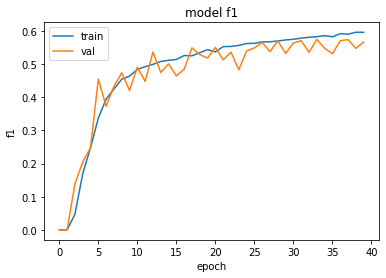

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

print(model.history.history.keys())
plt.plot(model.history.history['f1'])
plt.plot(model.history.history['val_f1'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()